In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
import scipy.stats as sct
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('../input/titanic/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Survived -> 0 = No, 1 = Yes
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [6]:
df['Survived'].value_counts()
# Many passangers did not survive

0    549
1    342
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Survived -> 0 = No, 1 = Yes')]

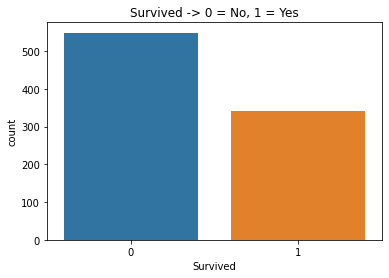

In [7]:
sur = sns.countplot(df['Survived'])
sur.set(title = 'Survived -> 0 = No, 1 = Yes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd')]

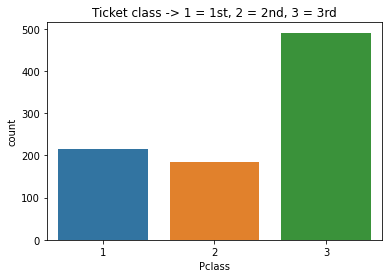

In [10]:
sns.countplot(df['Pclass']).set(title = 'Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd')

In [11]:
df['Name'].value_counts().max()
# Each name is different just like PassengerId, hence not fit for analysis.

1

In [12]:
df["Ticket"].value_counts()
# Ticket doesn't help much as we have included SibSp and Children

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [13]:
df[df['Ticket'] == '347082']
# We see that people with the same Ticket are usually from the same family.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

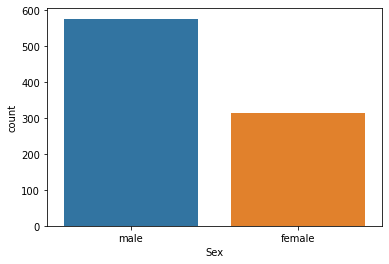

In [15]:
sns.countplot(df['Sex'])
# Male passengers were more than Female passengers

In [16]:
# SibSp -> Number of Siblings and spouses that were on the titanic.
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'No.of siblings/spouse aboard')]

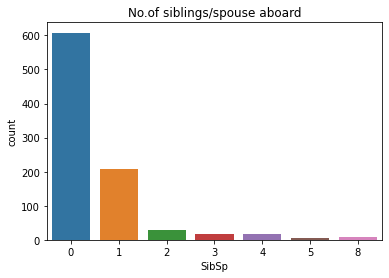

In [17]:
sns.countplot(df['SibSp']).set(title = 'No.of siblings/spouse aboard')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'No.of siblings/spouse aboard')]

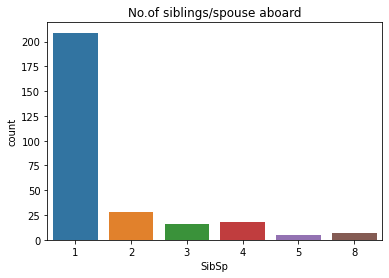

In [18]:
sns.countplot(df[df['SibSp']!=0]['SibSp']).set(title = 'No.of siblings/spouse aboard')

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df['Age'].mode()

0    24.0
dtype: float64

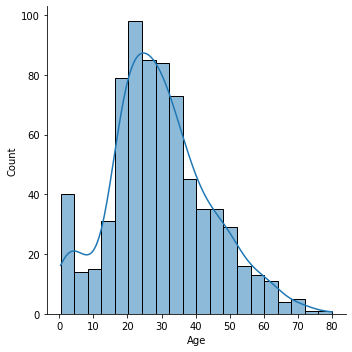

In [21]:
# Distribution of Age
sns.displot(df['Age'], kde = True)
# We see a right - skewed distribution

<AxesSubplot:>

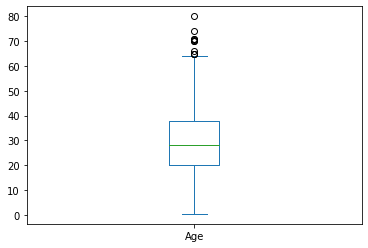

In [22]:
df['Age'].plot.box()

In [23]:
# Parch -> the number of parents/children aboard the titanic
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'The number of parents/children aboard the titanic')]

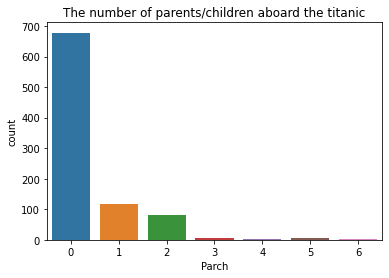

In [24]:
sns.countplot(df['Parch']).set(title = 'The number of parents/children aboard the titanic')

In [25]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

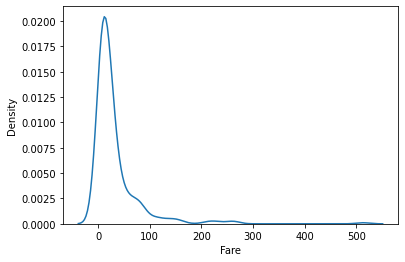

In [26]:
sns.kdeplot(df['Fare'])
# Most people travelled with a Lower Fare

<AxesSubplot:>

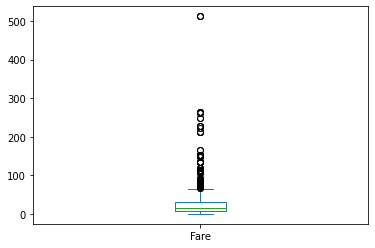

In [27]:
df['Fare'].plot.box()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


[(-10.0, 100.0)]

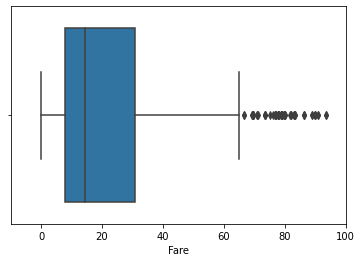

In [28]:
sns.boxplot(df['Fare'], orient = 'v').set(xlim = (-10,100))

In [29]:
# Cabin -> Cabin Number
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin', ylabel='count'>

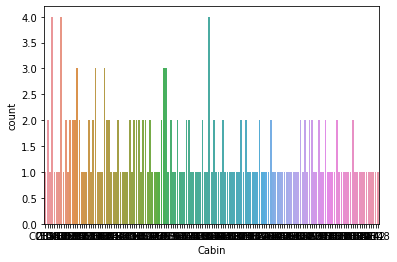

In [30]:
sns.countplot(df['Cabin'])

In [31]:
# Embarked -> Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton')]

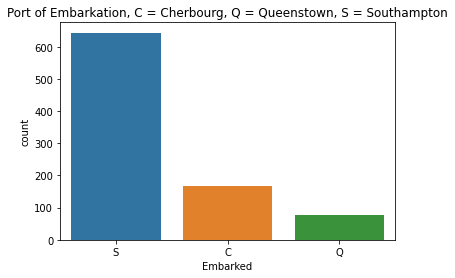

In [32]:
sns.countplot(df['Embarked']).set(title = 'Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton')

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Probability and Correlation

In [34]:
# According to Gender/Sex
pd.crosstab(index = df['Sex'], columns = df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [35]:
pd.crosstab(index = df['Sex'], columns = df['Survived'], normalize = 'index', margins=True)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


Survived -> 0 = No, 1 = Yes

The total chance of Surviving the Titanic diaster is just __0.383__

__61.6%__ of the passengers did not survive the Titanic sinking.

Therefore,

the probability of being a Female and surviving is __0.742__

the probability of being a male and surviving is __0.188__


In [36]:
# According to Ticket Class
pd.crosstab(index = df['Pclass'], columns = df['Survived'], normalize = 'index', margins=True)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


The highest chance of surviving the Titanic seems to be if you were a part of the 1st class i.e. __0.629630__



<AxesSubplot:>

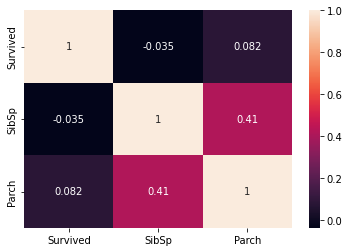

In [37]:
sns.heatmap(df[['Survived', 'SibSp', 'Parch']].corr(), annot = True)

In [38]:
print(pd.crosstab(index = df['SibSp'], columns = df['Survived'], normalize = 'index', margins=True))
print('----------------------------------------')
print(pd.crosstab(index = df['Parch'], columns = df['Survived'], normalize = 'index', margins=True))

Survived         0         1
SibSp                       
0         0.654605  0.345395
1         0.464115  0.535885
2         0.535714  0.464286
3         0.750000  0.250000
4         0.833333  0.166667
5         1.000000  0.000000
8         1.000000  0.000000
All       0.616162  0.383838
----------------------------------------
Survived         0         1
Parch                       
0         0.656342  0.343658
1         0.449153  0.550847
2         0.500000  0.500000
3         0.400000  0.600000
4         1.000000  0.000000
5         0.800000  0.200000
6         1.000000  0.000000
All       0.616162  0.383838


In [39]:
print(pd.crosstab(index = df['Embarked'], columns = df['Survived'], normalize = 'index', margins=True))

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957
All       0.617548  0.382452


### Chi-square Tests
For categorical Variables

In [40]:
# h0 -> There is no significance in survival difference among male and female passengers
# h1 -> There is significant difference in survival among male and female passengers
sex_cont = pd.crosstab(index = df['Sex'], columns = df['Survived'], margins=True)
sex_cont

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [41]:
sdata = sex_cont.values[:2, :2]

In [42]:
stat, p, dof, expected = chi2_contingency(sdata)
print(p)
if p<0.05:
    print('Reject null hypothesis, \nThere is significant difference in survival among male and female passengers')

1.1973570627755645e-58
Reject null hypothesis, 
There is significant difference in survival among male and female passengers


A passenger is more likely to survive if she is female.

In [43]:
class_cont = pd.crosstab(index = df['Pclass'], columns = df['Survived'], margins=True)
class_cont

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [44]:
cdata  = class_cont.values[:3, :2]
cdata

array([[ 80, 136],
       [ 97,  87],
       [372, 119]])

In [45]:
# h0 -> There is no significance in survival difference among passengers of different class
# h1 -> There is significant difference in survival passengers among of different class
stat, p, dof, expected = chi2_contingency(cdata)
print(p)
if p<0.05:
    print('Reject null hypothesis, \nThere is significant difference in survival among passengers of different Ticket class')

4.549251711298793e-23
Reject null hypothesis, 
There is significant difference in survival among passengers of different Ticket class
